In [1]:
""" Best DL CNN Videos
https://www.youtube.com/watch?v=ixF5WNpTzCA
https://www.youtube.com/watch?v=umGJ30-15_A
https://www.youtube.com/watch?v=YRhxdVk_sIs
"""

' Best DL CNN Videos\nhttps://www.youtube.com/watch?v=ixF5WNpTzCA\nhttps://www.youtube.com/watch?v=umGJ30-15_A\nhttps://www.youtube.com/watch?v=YRhxdVk_sIs\n'

In [2]:
import numpy
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


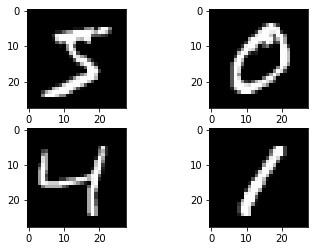

In [5]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [6]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [7]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',
    activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 3s - loss: 0.2794 - accuracy: 0.9218 - val_loss: 0.1359 - val_accuracy: 0.9597
Epoch 2/10
300/300 - 1s - loss: 0.1098 - accuracy: 0.9683 - val_loss: 0.1015 - val_accuracy: 0.9696
Epoch 3/10
300/300 - 1s - loss: 0.0708 - accuracy: 0.9793 - val_loss: 0.0776 - val_accuracy: 0.9766
Epoch 4/10
300/300 - 1s - loss: 0.0505 - accuracy: 0.9855 - val_loss: 0.0672 - val_accuracy: 0.9784
Epoch 5/10
300/300 - 1s - loss: 0.0372 - accuracy: 0.9895 - val_loss: 0.0695 - val_accuracy: 0.9808
Epoch 6/10
300/300 - 1s - loss: 0.0261 - accuracy: 0.9929 - val_loss: 0.0642 - val_accuracy: 0.9796
Epoch 7/10
300/300 - 1s - loss: 0.0192 - accuracy: 0.9951 - val_loss: 0.0610 - val_accuracy: 0.9796
Epoch 8/10
300/300 - 1s - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.0594 - val_accuracy: 0.9813
Epoch 9/10
300/300 - 1s - loss: 0.0109 - accuracy: 0.9977 - val_loss: 0.0585 - val_accuracy: 0.9824
Epoch 10/10
300/300 - 1s - loss: 0.0071 - accuracy: 0.9989 - val_loss: 0.0641 - val_accuracy: 0.9823

In [12]:
predicted = model.predict(X_test)
predicted_list = predicted.tolist()
predicted_09 = [row.index(max(row)) for row in predicted_list]
print(predicted_09)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [13]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted_09))
print(metrics.confusion_matrix(y_test, predicted_09))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 972    0    1    0    1    2    1    1    2    0]
 [   1 1123    4    0    0    0    2    1    4    0]
 [   0    1 1021    0    1    0    1    3    5    0]
 [   0    0    6  989    0    5    0    1    5    4]
 [   2    0    4    0  970   

# ============
# Now with CNN
# ============

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# to get values which are not normalised for plotting

8


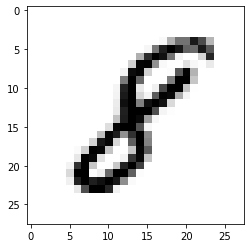

In [17]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [20]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

# Notes and explanations ...

In [21]:
"""
1) The first hidden layer is a convolutional layer called a Conv2D. The layer has
28 feature maps, which with the size of 3 by 3.

2) Next we define a pooling layer that takes the maximum value called MaxPooling2D.
It is configured with a pool size of 2  2.

3). Next is a layer that converts the 2D matrix data to a vector called Flatten.
It allows the output to be processed by standard fully connected layers.

4) Next a fully connected layer with 128 neurons and rectifier activation function
is used.

5) The next layer is a regularization layer using dropout called Dropout. It is
configured to randomly exclude 20% of neurons in the layer in order to reduce
overfitting.

6. Finally, the output layer has 10 neurons for the 10 classes and a softmax
activation function to output probability-like predictions for each class.

The model is trained using sparse_categorical_crossentropy and the ADAM gradient descent algorithm.
"""

'\n1) The first hidden layer is a convolutional layer called a Conv2D. The layer has\n28 feature maps, which with the size of 3 by 3.\n\n2) Next we define a pooling layer that takes the maximum value called MaxPooling2D.\nIt is configured with a pool size of 2 \x02 2.\n\n3). Next is a layer that converts the 2D matrix data to a vector called Flatten.\nIt allows the output to be processed by standard fully connected layers.\n\n4) Next a fully connected layer with 128 neurons and rectifier activation function\nis used.\n\n5) The next layer is a regularization layer using dropout called Dropout. It is\nconfigured to randomly exclude 20% of neurons in the layer in order to reduce\noverfitting.\n\n6. Finally, the output layer has 10 neurons for the 10 classes and a softmax\nactivation function to output probability-like predictions for each class.\n\nThe model is trained using sparse_categorical_crossentropy and the ADAM gradient descent algorithm.\n'

In [22]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 2ms/step - loss: 0.3553 - accuracy: 0.8935
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0816 - accuracy: 0.9762
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0378 - accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0240 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0217 - accuracy: 0.9932
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0190 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0175 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0717 - accuracy: 0.9835


[0.07172401994466782, 0.9835000038146973]

In [25]:
predicted_list = []
for test in x_test:
    predicted = model.predict(test.reshape(1,28,28,1))
    predicted_2 = predicted
    predicted_list.append(predicted_2)
# print(predicted_list)

In [26]:
for row in predicted_list:
    print(row.tolist().pop())
    break

[1.5207827401900187e-12, 9.466843975403094e-10, 1.1274267977534613e-11, 1.1075264438886734e-07, 1.7846402795233113e-13, 1.1950012648257596e-13, 4.818944608079494e-16, 0.9999998807907104, 1.1717767598243278e-12, 3.229242151459033e-10]


In [27]:
# predicted_09 = [row.index(max(row)) for row in predicted_list]
# print(predicted_09)
predicted_09 = []
for row in predicted_list:
    mod_row = row.tolist().pop()
    index_val = mod_row.index(max(mod_row))
    predicted_09.append(index_val)
print(predicted_09)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [28]:
print(metrics.classification_report(y_test, predicted_09))
print(metrics.confusion_matrix(y_test, predicted_09))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 975    1    0    0    0    0    3    1    0    0]
 [   0 1131    0    0    0    1    3    0    0    0]
 [   1    2 1017    1    1    0    1    6    3    0]
 [   0    0    2  998    0    4    0    3    2    1]
 [   2    0    3    0  973   

9


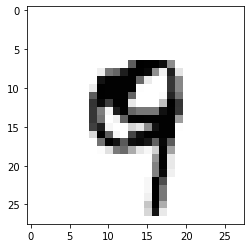

In [29]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28, 1))
print(pred.argmax())